In [1]:
# 1. Import the libraries
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

In [27]:
# 2. Reading the data
df=pd.read_csv("train_ctrUa4k.csv")
test=pd.read_csv('test_lAUu6dG.csv')

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [84]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


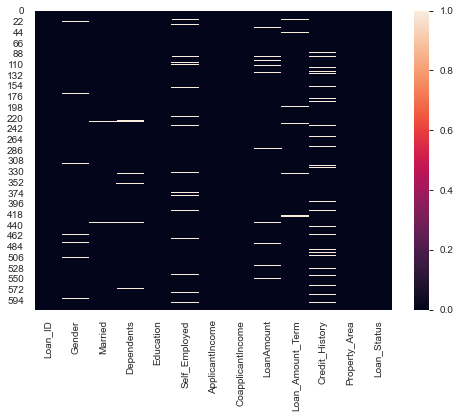

In [85]:
sns.heatmap(df.isnull())

In [86]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [28]:
df.replace(to_replace=['Male','Yes','1','Graduate','Urban','Y'],value=1,inplace=True)
df.replace(to_replace=['Female','No','2','Not Graduate','Rural'],value=2,inplace=True)
df.replace(to_replace=['Semiurban','3+'],value=3,inplace=True)
df.replace(to_replace=['0','N'],value=0,inplace=True)

In [4]:
df['Gender'].mode()

0    1.0
dtype: float64

In [5]:
df['Married'].mode()

0    1.0
dtype: float64

In [6]:
df['Dependents'].mode()

0    0.0
dtype: float64

In [7]:
df['Self_Employed'].mode()

0    2.0
dtype: float64

In [8]:
df['LoanAmount'].mean()

146.41216216216216

In [9]:
df['Loan_Amount_Term'].mode()

0    360.0
dtype: float64

In [10]:
df['Credit_History'].mode()

0    1.0
dtype: float64

In [29]:
df['LoanAmount'].replace(np.nan,146,inplace=True)
df['Credit_History'].replace(np.nan,1,inplace=True)
df['Loan_Amount_Term'].replace(np.nan,360,inplace=True)
df['Gender'].replace(np.nan,1,inplace=True)
df['Married'].replace(np.nan,1,inplace=True)
df['Dependents'].replace(np.nan,0,inplace=True)
df['Self_Employed'].replace(np.nan,2,inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    float64
 2   Married            614 non-null    float64
 3   Dependents         614 non-null    float64
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    float64
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 62.5+ KB


In [31]:
test.pop('Loan_ID')

0      LP001015
1      LP001022
2      LP001031
3      LP001035
4      LP001051
         ...   
362    LP002971
363    LP002975
364    LP002980
365    LP002986
366    LP002989
Name: Loan_ID, Length: 367, dtype: object

In [32]:
test.replace(to_replace=['Male','Yes','1','Graduate','Urban'],value=1,inplace=True)
test.replace(to_replace=['Female','No','2','Not Graduate','Rural'],value=2,inplace=True)
test.replace(to_replace=['Semiurban','3+'],value=3,inplace=True)
test.replace(to_replace=['0'],value=0,inplace=True)

In [13]:
test['Gender'].mode()

0    1.0
dtype: float64

In [14]:
test['Married'].mode()

0    1
dtype: int64

In [15]:
test['Dependents'].mode()

0    0.0
dtype: float64

In [16]:
test['Self_Employed'].mode()

0    2.0
dtype: float64

In [17]:
test['LoanAmount'].mean()

136.13259668508286

In [18]:
test['Loan_Amount_Term'].mode()

0    360.0
dtype: float64

In [19]:
test['Credit_History'].mode()

0    1.0
dtype: float64

In [33]:
test['LoanAmount'].replace(np.nan,136,inplace=True)
test['Credit_History'].replace(np.nan,1,inplace=True)
test['Loan_Amount_Term'].replace(np.nan,360,inplace=True)
test['Gender'].replace(np.nan,1,inplace=True)
test['Married'].replace(np.nan,1,inplace=True)
test['Dependents'].replace(np.nan,0,inplace=True)
test['Self_Employed'].replace(np.nan,2,inplace=True)

In [34]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             367 non-null    float64
 1   Married            367 non-null    int64  
 2   Dependents         367 non-null    float64
 3   Education          367 non-null    int64  
 4   Self_Employed      367 non-null    float64
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         367 non-null    float64
 8   Loan_Amount_Term   367 non-null    float64
 9   Credit_History     367 non-null    float64
 10  Property_Area      367 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 31.7 KB


In [108]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,1,0.0,1,2.0,5720,0,110.0,360.0,1.0,1
1,1.0,1,1.0,1,2.0,3076,1500,126.0,360.0,1.0,1
2,1.0,1,2.0,1,2.0,5000,1800,208.0,360.0,1.0,1
3,1.0,1,2.0,1,2.0,2340,2546,100.0,360.0,1.0,1
4,1.0,2,0.0,2,2.0,3276,0,78.0,360.0,1.0,1


In [35]:
X=df.drop(['Loan_ID','Loan_Status'], axis=1).values
y=df['Loan_Status'].values

In [36]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=10)

In [111]:
# Logestic
log_reg=LogisticRegression(random_state=0)
log_reg.fit(X_train, y_train)

c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=0)

In [112]:
y_predict=log_reg.predict(X_test)

In [113]:
cm=confusion_matrix(y_test, y_predict)

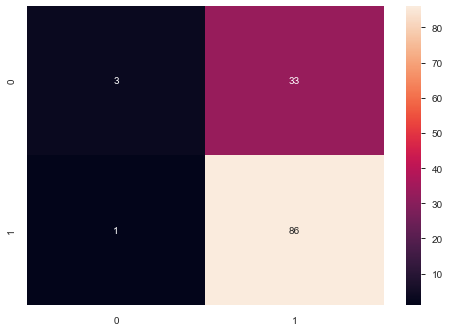

In [114]:
sns.heatmap(cm, annot=True, fmt='d')

In [115]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           N       0.75      0.08      0.15        36
           Y       0.72      0.99      0.83        87

    accuracy                           0.72       123
   macro avg       0.74      0.54      0.49       123
weighted avg       0.73      0.72      0.63       123



In [116]:
# Grid Search
param_grid={
    'penalty':['l2'],
    'C':np.logspace(-4,4,20),
    'solver':['liblinear', 'newton-cg','sag', 'saga']
}

In [117]:
clf=GridSearchCV(log_reg, param_grid=param_grid, cv=10, verbose=True, n_jobs=-1)

In [118]:
best_clf=clf.fit(X_train, y_train)

Fitting 10 folds for each of 80 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:   29.3s finished


In [119]:
print(best_clf.best_params_)

{'C': 4.281332398719396, 'penalty': 'l2', 'solver': 'liblinear'}


In [120]:
y_predict=best_clf.predict(X_test)

In [121]:
cm=confusion_matrix(y_test, y_predict)

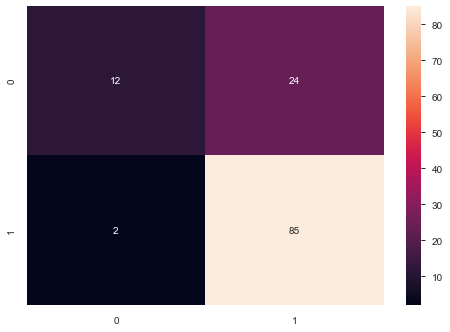

In [122]:
sns.heatmap(cm,annot=True,fmt='d')

In [123]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           N       0.86      0.33      0.48        36
           Y       0.78      0.98      0.87        87

    accuracy                           0.79       123
   macro avg       0.82      0.66      0.67       123
weighted avg       0.80      0.79      0.75       123



In [74]:
# Random Forest
rf=RandomForestClassifier(n_estimators=100,criterion='entropy')

In [75]:
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy')

In [76]:
y_predict=rf.predict(X_test)

In [77]:
cm=confusion_matrix(y_test,y_predict)

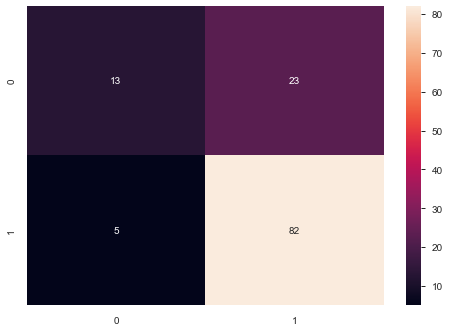

In [78]:
sns.heatmap(cm,fmt='d',annot=True)

In [79]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           N       0.72      0.36      0.48        36
           Y       0.78      0.94      0.85        87

    accuracy                           0.77       123
   macro avg       0.75      0.65      0.67       123
weighted avg       0.76      0.77      0.75       123



In [124]:
y_predict=best_clf.predict(test)

In [125]:
y_predict

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [126]:
y_predict.shape

(367,)

In [127]:
predict=pd.DataFrame(data=y_predict)

In [128]:
predict.head()

,0
0,Y
1,Y
2,Y
3,Y
4,Y


In [129]:
import csv
status_=predict.values.tolist()
for i in status_:
    status=open('solution13.csv','a',newline='')
    data_write=csv.writer(status)
    data_write.writerows(i)
status.close()

# XGBoost Classifier

In [37]:
import xgboost as xgb

In [38]:
X_train = X_train.astype('int')
X_test = X_test.astype('int')

In [39]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [40]:
y_predict = model.predict(X_test)

In [41]:
cm=confusion_matrix(y_test, y_predict)

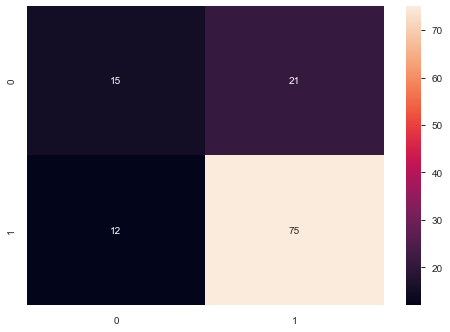

In [42]:
sns.heatmap(cm,fmt='d',annot=True)

In [43]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.56      0.42      0.48        36
           1       0.78      0.86      0.82        87

    accuracy                           0.73       123
   macro avg       0.67      0.64      0.65       123
weighted avg       0.72      0.73      0.72       123



In [45]:
test=test.astype('int').values

In [46]:
y_predict = model.predict(test)

In [47]:
y_predict

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,

In [48]:
y_predict.shape

(367,)

In [49]:
predict=pd.DataFrame(data=y_predict)

In [50]:
predict.replace(to_replace=[0],value='N',inplace=True)
predict.replace(to_replace=[1],value='Y',inplace=True)

In [51]:
predict.head()

,0
0,Y
1,Y
2,Y
3,Y
4,N


In [52]:
predict.to_csv('solution14.csv',index=False)